<h1 style="color:red"><center>Hello, this notebook is for doing analysis and classification of some Netflix movies</center></h1>

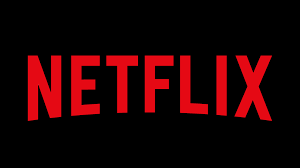

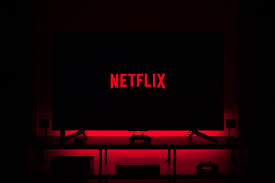

# Call some simple libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# read data 

In [ ]:

netflix_df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# Check for Missing Values

In [ ]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("green", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(netflix_df)

In [ ]:
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df[['rating','country']].isna().sum()

# showing some data

In [ ]:
netflix_df.nunique()

In [ ]:
netflix_df

# Show some information on this data

In [ ]:
netflix_df.info()

# View a description of that data

In [ ]:
netflix_df.describe()

# view shape of data

In [ ]:
netflix_df.shape

# Examine the data whether it contains empty columns or cells or not

In [ ]:
netflix_df.isnull()

# Display the last data in the table

In [ ]:
netflix_df.tail()

# Rading the columns of data

In [ ]:
netflix_df.columns

make a show data foem 10 to 190

In [ ]:
netflix_df.loc[10:190]

In [ ]:
netflix_shows=netflix_df[netflix_df['type']=='TV Show']

In [ ]:
netflix_shows

In [ ]:
netflix_movies=netflix_df[netflix_df['type']=='Movie']

# cheacking data if is inqueu

In [ ]:

netflix_df.nunique()

# Using matplotlib and seaborn to show data and understand

In [ ]:
sns.heatmap(netflix_df.isnull(),cmap = 'Reds')
plt.title('Null Values Heatmap')
plt.show()

# plot the few columns to show some detils and data.

In [ ]:
import missingno as msno
msno.bar(netflix_df,color = 'indianred')
plt.show()

# drop id column

In [ ]:

netflix_df.drop('show_id',axis=1, inplace = True)

# # Replace nan values in data_added with January 1,{release_year}

In [ ]:

netflix_df['date_added']=netflix_df['date_added'].fillna('January 1, {}'.format(str(netflix_df['release_year'].mode()[0])))

In [ ]:
netflix_df["release_month"] = netflix_df['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix_df.head()

In [ ]:
netflix_df['rating'].value_counts()

#  Replace nan values in rating with TV-MA

In [ ]:

netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [ ]:
netflix_df['country'].value_counts()

# Using Visualization to define data and show many 

In [ ]:
print(netflix_df.type.value_counts())
sns.countplot(netflix_df.type,palette="pastel")
plt.show()

# Make a  Analysis 

In [ ]:
rating_counts = netflix_df.rating.value_counts()
print(rating_counts)
plt.figure(figsize = (12,8))
sns.countplot(netflix_df.rating, order = rating_counts.index[0:15],palette="pastel")
plt.title("Ratings for Movies And Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

In [ ]:
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes = rating_counts.values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Ratings for Movies And Shows',fontsize = 15)
plt.show()

# Type - rating 


In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = netflix_df,hue='type',palette="pastel")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

In [ ]:
release_year_counts = netflix_df.release_year.value_counts()
print(release_year_counts)
plt.figure(figsize = (35,8))
sns.countplot(netflix_df.release_year, order = release_year_counts.index[0:94],palette="pastel")
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="release_month",data= netflix_df,order = netflix_df['release_month'].value_counts().index[0:12],palette="pastel")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(netflix_df["country"].value_counts().head())
plt.figure(figsize=(20,6))
sns.countplot(x="country",data= netflix_df,hue= "type",order = netflix_df['country'].value_counts().index[0:15],palette="pastel")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(netflix_movies["listed_in"].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.countplot(y='listed_in',data = netflix_movies,order =netflix_movies["listed_in"].value_counts().index[0:10],palette="pastel")
plt.title("Top 10 Genres of Movies",size=18)
plt.show()

In [ ]:
netflix_movies.duration = netflix_movies.duration.str.replace(' min','').astype(int)
netflix_shows.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows.seasons = netflix_shows.seasons.str.replace(' Seasons','').astype(int)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(netflix_movies.duration,ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_shows.seasons,ax=ax[1],palette="pastel");
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

In [ ]:
oldest = netflix_df.sort_values("release_year", ascending = True) 
oldest[['title', "release_year"]][:10]

In [ ]:
standup=netflix_df[netflix_df["listed_in"] == "Stand-Up Comedy"]
standup[["title","country","release_year"]].head(10)

In [ ]:
kids=netflix_df[netflix_df["listed_in"] == "Kids' TV"]
kids[["title","country","release_year"]].head(10)

In [ ]:
movie_duration = netflix_df.loc[netflix_df['type']=='Movie']

plt.figure(figsize=(12,10))

ax = sns.histplot(data = movie_duration,x = 'duration',bins = 50,kde = True,color = 'red')
plt.title('Movie Duration',fontsize = 15)
plt.xlabel('Total Duration(In Mins)',fontsize = 15)
plt.ylabel('Total Movie Count',fontsize = 15)

In [ ]:
movie = netflix_df.loc[netflix_df['type']=='Movie']
movie_trends = movie[movie['release_year']>=2016]
df = movie_trends.groupby(['release_year','rating']).size().reset_index(name = 'Total')
df1 = df[df['Total'] >= 10]

plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
sns.barplot(data = df1,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('Movies released by rating since 2016 and beyond(more than 10 releases per year)')
plt.xlabel('Year')
plt.ylabel('Total Count')

In [ ]:
df = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['country'] == 'India') ]
tv_show_India = df.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (12,10))
sns.set_style('darkgrid')
sns.barplot(data = tv_show_India,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released by India by ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)

In [ ]:
tv_show_USA= netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['country'] == 'United States') ]

tv_show_USA = tv_show_USA[tv_show_USA['release_year']>=2010]

df = tv_show_USA.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (12,10))
sns.set_style('darkgrid')
sns.barplot(data = df,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released by United States by ratings')

In [ ]:
movie_genre = netflix_df.loc[netflix_df['type'] == 'Movie']
plt.figure(figsize=(12,6))
ax = sns.countplot(y='listed_in',data = movie_genre,order = movie_genre["listed_in"].value_counts().index[0:10],palette="Set2")
plt.title('Top Ten Movie Genre',fontsize = 15)
plt.xlabel('Total Count',fontsize = 15)
plt.ylabel('Genre',fontsize = 15)


In [ ]:
Tv_Show_genre = netflix_df.loc[netflix_df['type'] == 'TV Show']
plt.figure(figsize=(12,6))
ax = sns.countplot(y='listed_in',data = Tv_Show_genre,order = Tv_Show_genre["listed_in"].value_counts().index[0:10],palette="Set2")
plt.title('Top Ten Tv Show Genre',fontsize = 15)
plt.xlabel('Total Count',fontsize = 15)
plt.ylabel('Genre',fontsize = 15)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=200, 
                          random_state=200
                         ).generate(str(netflix_df['listed_in']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()